In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [62]:
X=np.load("./X.npy")
y=np.load("./y.npy")


In [63]:
print(f"The Shape of X : {X.shape} \nThe shape of y:{y.shape}")

The Shape of X : (5000, 400) 
The shape of y:(5000, 1)


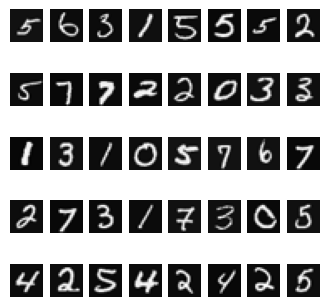

In [64]:
fig,ax =plt.subplots(5,8,figsize=(4,4))

for i,axis in enumerate(ax.flatten()):
    random_index=np.random.randint(4000)
    image=X[random_index].reshape((20,20)).T

    axis.imshow(image,cmap='gray') 
    axis.axis('off')

In [65]:
print(f"No of Classes: {np.unique(y).shape[0]}  : are :{np.unique(y)}")

No of Classes: 10  : are :[0 1 2 3 4 5 6 7 8 9]


In [66]:
model=Sequential([
    tf.keras.Input((400,)),
    Dense(units=25,activation='relu',name='layer_1'),
    Dense(units=15,activation='relu',name='layer_2'),
    Dense(units=10,activation='linear',name='layer_3'),
])

In [67]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
[layer1,layer2,layer3]=model.layers

In [69]:
W1,b1=layer1.get_weights()
W2,b2=layer2.get_weights()
W3,b3=layer3.get_weights()
print(f"Weight and bias of layer_1 : {W1.shape} , {b1.shape}")
print(f"Weight and bias of layer_2 : {W2.shape} , {b2.shape}")
print(f"Weight and bias of layer_3 : {W3.shape} , {b3.shape}")

Weight and bias of layer_1 : (400, 25) , (25,)
Weight and bias of layer_2 : (25, 15) , (15,)
Weight and bias of layer_3 : (15, 10) , (10,)


In [70]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [71]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=1e-3))

history=model.fit(X,y,epochs=100)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9570
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.7045
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.4465
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.3489
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.2975
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.2706
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2588 
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2228
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2120
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2125
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1866
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.1706
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.1662
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1544
Epoch 15/100
157/157 ━━━━━━━

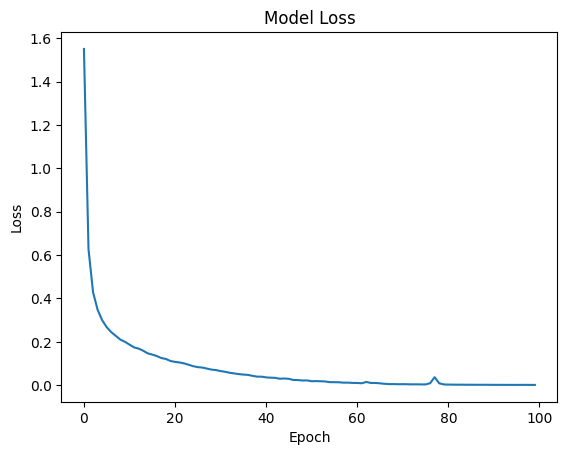

In [72]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

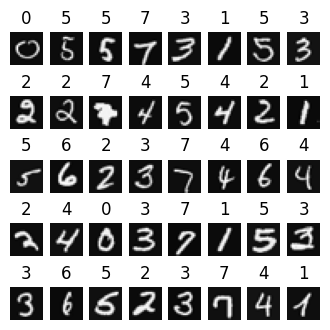

In [75]:
fig,ax =plt.subplots(5,8,figsize=(4,4))

for i,axis in enumerate(ax.flatten()):
    random_index=np.random.randint(4000)
    image=X[random_index].reshape((20,20)).T

    Z=model.predict(X[random_index].reshape((1,400)))
    a=tf.nn.softmax(Z)
    yhat=np.argmax(a)
    axis.set_title(yhat)

    axis.imshow(image,cmap='gray') 
    axis.axis('off')